# Import Libraries and initialize the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
west_bank = pd.read_csv("/kaggle/input/daily-casualties/west_bank_daily.csv") # Initialize the West Bank Dataset
gaza = pd.read_csv("/kaggle/input/daily-casualties/casualties_daily_gaza.csv") # Initialize the Gaza Strip Dataset
west_bank = west_bank.dropna(axis="rows", how="any")


# Gaza Report

In [3]:
gaza.head()

,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
0,2023-10-07,mohtel,24,0,232.0,232.0,232,232,0,0,1610.0,1610,1610,0,6.0,6,1.0,1
1,2023-10-08,mohtel,24,0,138.0,370.0,138,370,78,41,1788.0,178,1788,0,NaN,6,1.0,1
2,2023-10-09,mohtel,24,8,190.0,560.0,190,560,91,61,2271.0,483,2271,0,6.0,6,3.0,3
3,2023-10-10,mohtel,24,8,340.0,900.0,340,900,260,230,4000.0,1729,4000,0,NaN,6,7.0,7
4,2023-10-11,gmotel,24,23,200.0,1100.0,200,1100,398,230,5184.0,1184,5184,0,10.0,10,NaN,7


In [4]:
gaza[["ext_killed", "ext_injured"]].describe()

,ext_killed,ext_injured
count,531.000000,531.000000
mean,93.600753,212.962335
std,114.663917,324.894134
min,0.000000,0.000000
25%,30.000000,69.000000
50%,55.000000,118.000000
75%,107.000000,220.000000
max,828.000000,3652.000000


Given the random nature of the data, we can't directly use mean and standard deviation to describe the data, so we'll use IQRs

outliers: [array([232, 340, 317, 483, 328, 442, 478, 307, 352, 248, 266, 436, 704,
       756, 481, 298, 377, 302, 304, 280, 256, 228, 285, 252, 306, 241,
       249, 260, 500, 300, 700, 300, 828, 404, 268, 407, 316, 376, 349,
       579, 350, 310, 297, 250, 241, 249, 239, 283, 531, 598, 436, 604],
      dtype=object)]
boxes: [array([ 30.,  30., 107., 107.,  30.])]
medians: [array([55., 55.])]
whiskers: [array([30.,  0.]), array([107., 218.])]



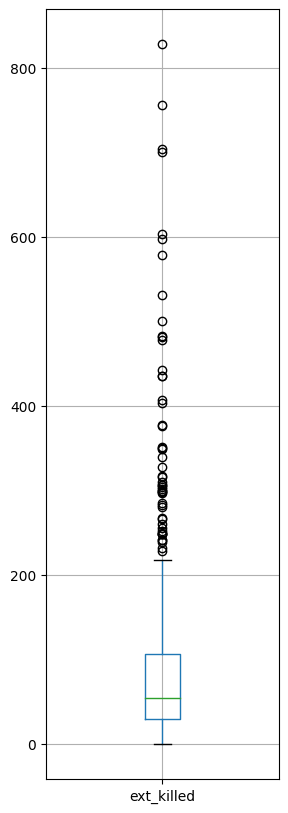

In [5]:
_, bp = gaza[["ext_killed"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

outliers: [array([1610, 483, 1729, 1184, 579, 1475, 1476, 486, 1650, 607, 608, 669,
       684, 1028, 1024, 1142, 1043, 485, 637, 638, 806, 495, 697, 671,
       605, 642, 650, 956, 519, 585, 800, 600, 1000, 2000, 2000, 1000,
       1000, 3652, 664, 684, 1616, 1192, 1192, 480, 2300, 449, 455, 494,
       543, 543, 500, 510, 920, 814, 487, 678], dtype=object)]
boxes: [array([ 69.,  69., 220., 220.,  69.])]
medians: [array([118., 118.])]
whiskers: [array([69.,  0.]), array([220., 430.])]



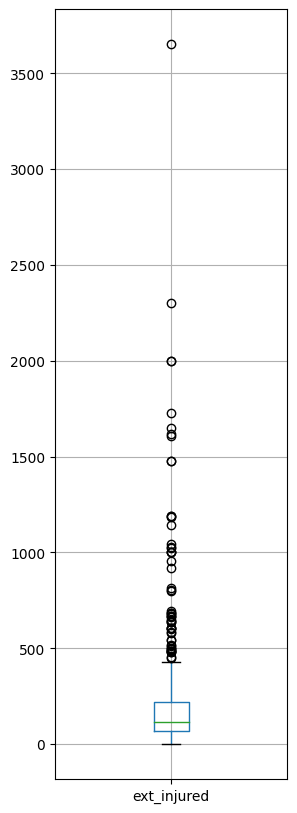

In [6]:
_, bp = gaza[["ext_injured"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

In [7]:
gaza["report_month"] = gaza.report_date.apply(lambda x: x[:-3])

gaza[["ext_killed", "ext_injured", "report_month"]].groupby("report_month").mean() # Average murders and injuries caused per month.

,ext_killed,ext_injured
report_month,,
2023-10,341.000000,861.720000
2023-11,209.166667,481.900000
2023-12,226.516129,659.709677
2024-01,163.806452,306.387097
2024-02,108.103448,155.448276
2024-03,88.612903,156.161290
2024-04,58.433333,80.200000
2024-05,56.419355,140.419355
2024-06,53.100000,163.733333


In [8]:
gaza_group_by_month = gaza[["ext_killed", "ext_injured", "report_month"]].groupby("report_month").sum()
gaza_group_by_month

,ext_killed,ext_injured
report_month,,
2023-10,8525,21543
2023-11,6275,14457
2023-12,7022,20451
2024-01,5078,9498
2024-02,3135,4508
2024-03,2747,4841
2024-04,1753,2406
2024-05,1749,4353
2024-06,1593,4912


In [9]:
gaza_group_by_month.describe()

,ext_killed,ext_injured
count,18.000000,18.000000
mean,2761.222222,6282.388889
std,2330.884724,6218.671857
min,905.000000,200.000000
25%,1268.750000,3039.250000
50%,1671.000000,4228.500000
75%,3038.000000,5189.500000
max,8525.000000,21543.000000


outliers: [array([8525, 6275, 7022], dtype=object)]
boxes: [array([1268.75, 1268.75, 3038.  , 3038.  , 1268.75])]
medians: [array([1671., 1671.])]
whiskers: [array([1268.75,  905.  ]), array([3038., 5078.])]



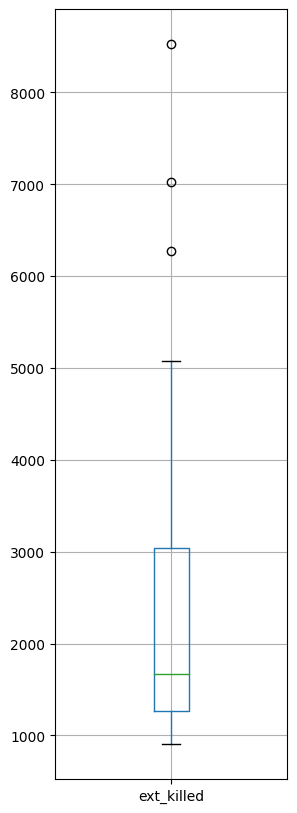

In [10]:
_, bp = gaza_group_by_month[["ext_killed"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

outliers: [array([21543, 14457, 20451, 9498], dtype=object)]
boxes: [array([3039.25, 3039.25, 5189.5 , 5189.5 , 3039.25])]
medians: [array([4228.5, 4228.5])]
whiskers: [array([3039.25,  200.  ]), array([5189.5, 5282. ])]



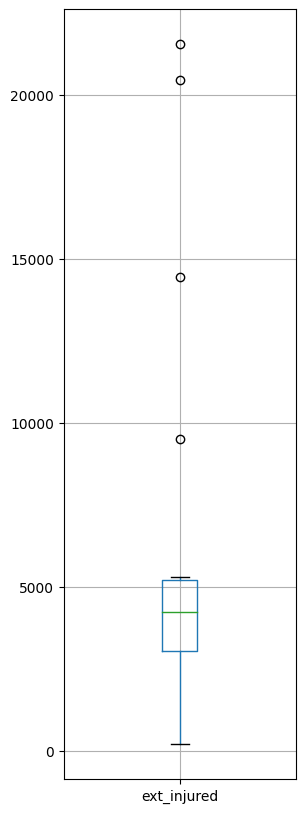

In [11]:
_, bp = gaza_group_by_month[["ext_injured"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

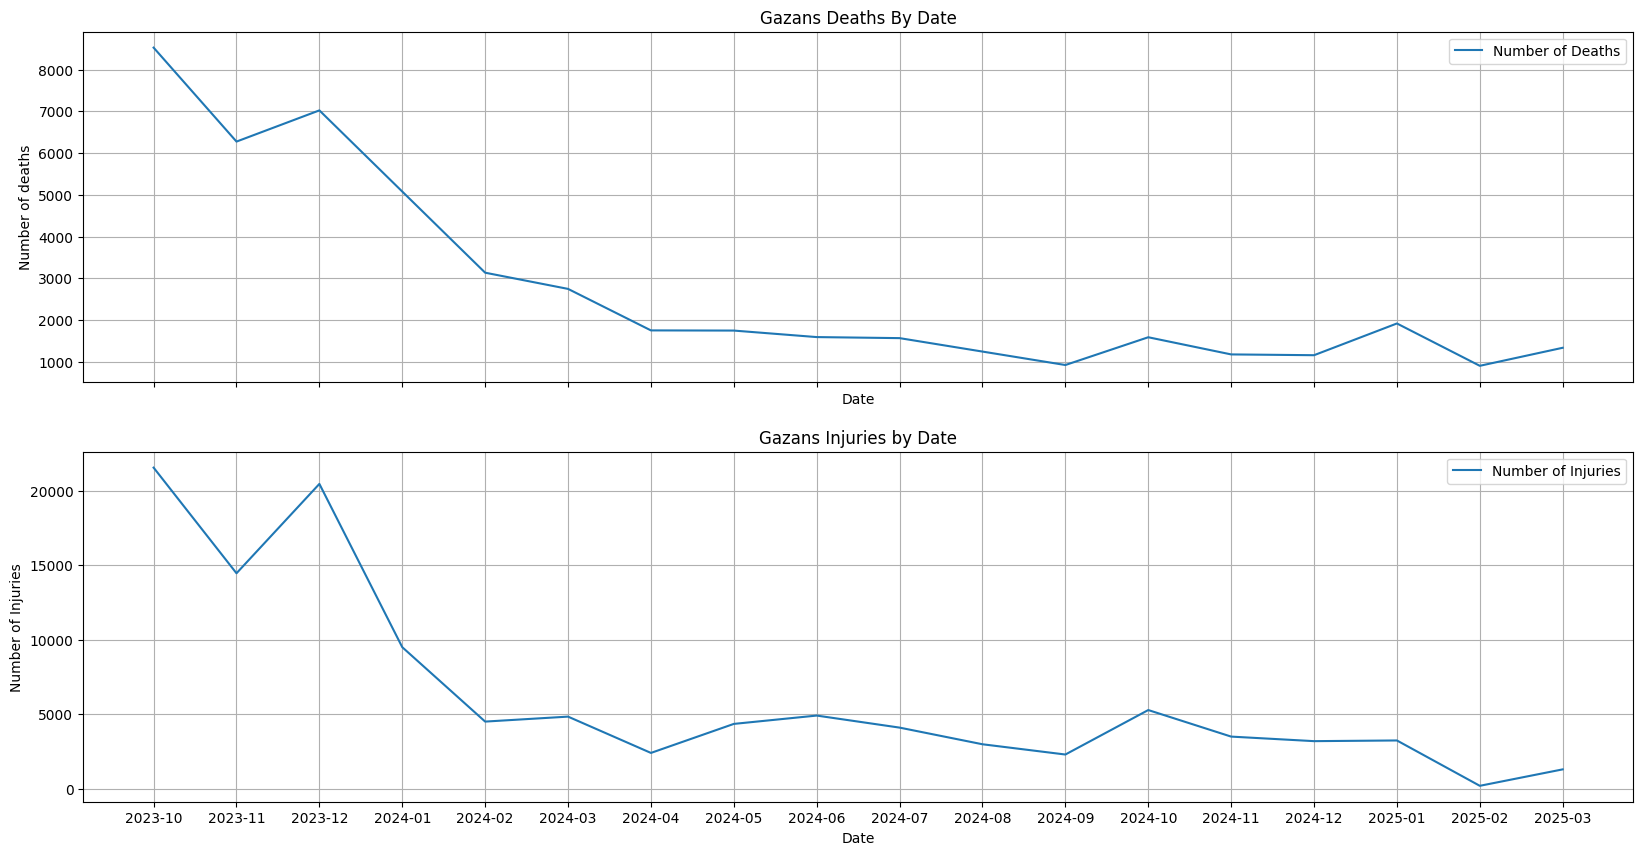

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Gazans Deaths by Month
ax1.plot(gaza_group_by_month.index ,gaza_group_by_month["ext_killed"])
ax1.set_title("Gazans Deaths By Date")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of deaths")
ax1.legend(["Number of Deaths"])
ax1.grid(visible=True)

# Gazans Injuries by Month
ax2.plot(gaza_group_by_month.index, gaza_group_by_month["ext_injured"])
ax2.set_title("Gazans Injuries by Date")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Injuries")
ax2.legend(["Number of Injuries"])
ax2.grid(visible=True)

plt.show()

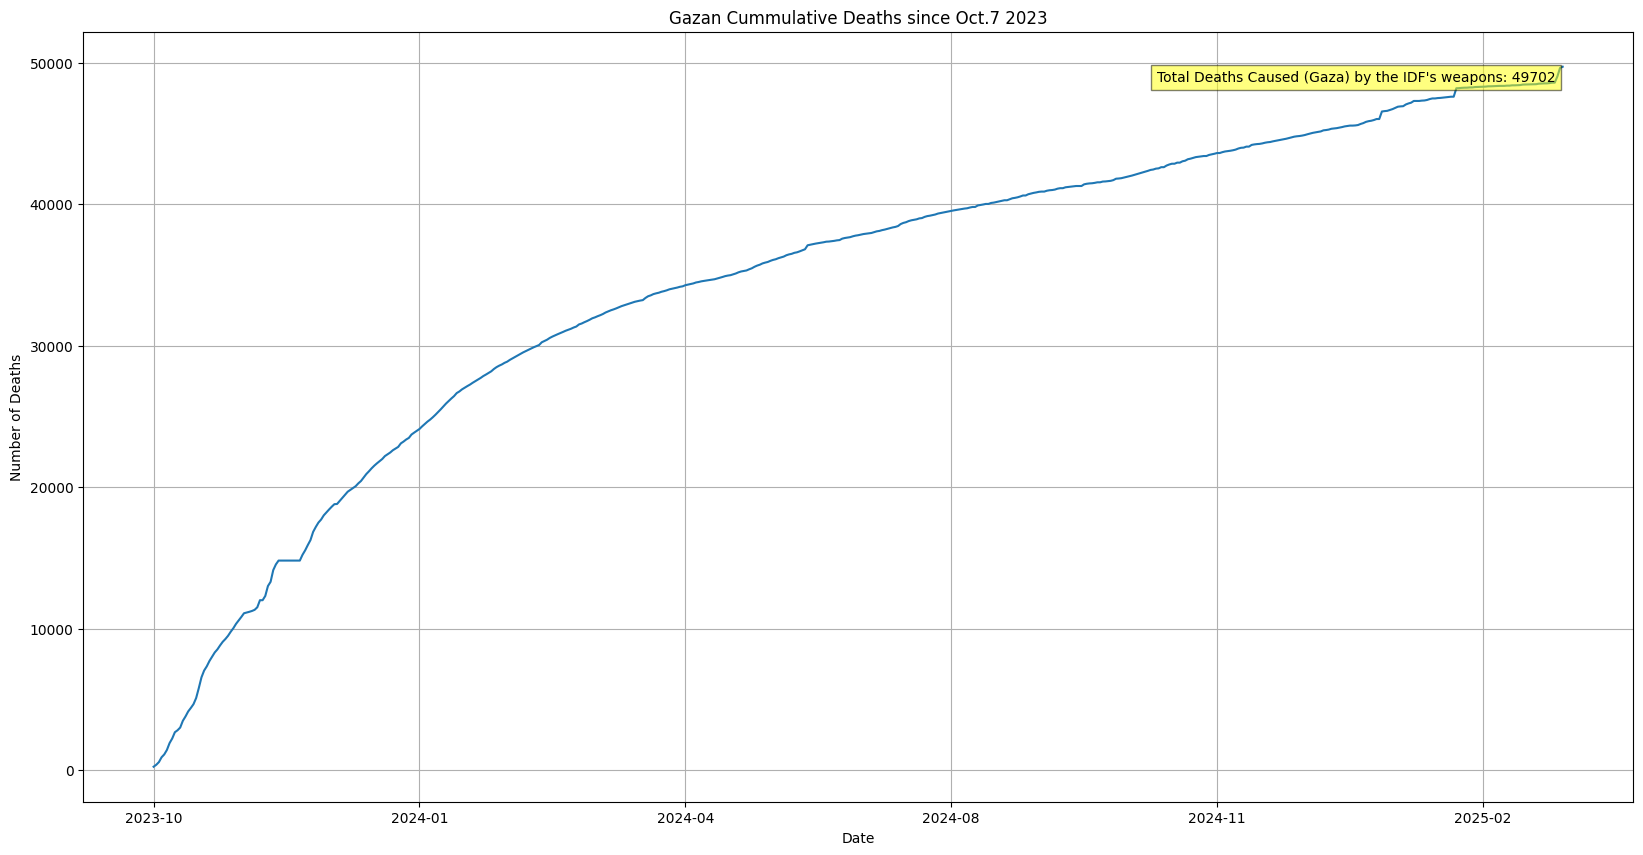

In [13]:
ax = plt.axes()

gaza.plot("report_month", "ext_killed_cum", ax=ax, grid=True, legend=None, figsize=(20, 10))

# Get the maximum number of deaths
max_total = gaza["ext_killed_cum"].max()

# Annotate the maximum values on the plot
plt.text(0.95, 0.95, f"Total Deaths Caused (Gaza) by the IDF's weapons: {max_total}", 
         transform=ax.transAxes, ha='right', va='top',
         bbox=dict(facecolor='yellow', alpha=0.5))

plt.title("Gazan Cummulative Deaths since Oct.7 2023")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")

plt.show()

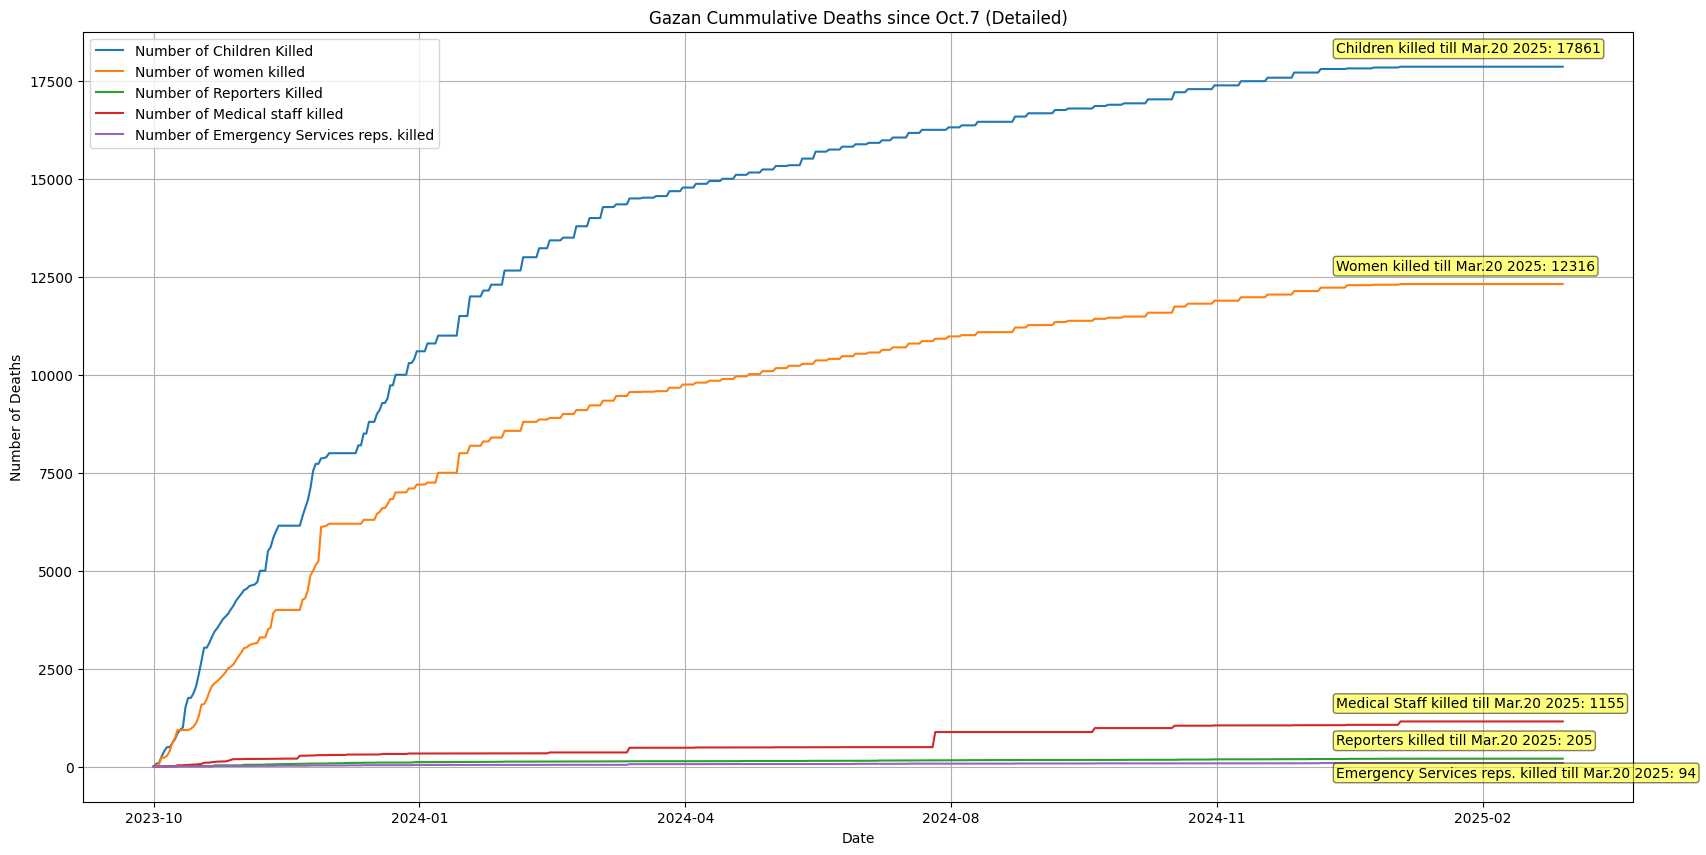

In [14]:
ax = plt.axes()
gaza.plot("report_month", ["ext_killed_children_cum", "ext_killed_women_cum", "ext_press_killed_cum", "ext_med_killed_cum", "ext_civdef_killed_cum"], ax=ax, grid=True, figsize=(20, 10),
         title = "Gazan Cummulative Deaths since Oct.7 (Detailed)", xlabel="Date", ylabel="Number of Deaths")

max_children = gaza["ext_killed_children_cum"].max()
max_women = gaza["ext_killed_women_cum"].max()
max_med = gaza["ext_med_killed_cum"].max()
max_reporter = gaza["ext_press_killed_cum"].max()
max_civdef = gaza["ext_civdef_killed_cum"].max()

ax.annotate(f'Children killed till Mar.20 2025: {int(max_children)}', 
            xy=(450, max_children),
            xytext=(-10,10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax.annotate(f'Women killed till Mar.20 2025: {int(max_women)}', 
            xy=(450, max_women),
            xytext=(-10,10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax.annotate(f'Medical Staff killed till Mar.20 2025: {int(max_med)}', 
            xy=(450, max_med),
            xytext=(-10,10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax.annotate(f'Reporters killed till Mar.20 2025: {int(max_reporter)}', 
            xy=(450, max_reporter),
            xytext=(-10, 10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax.annotate(f'Emergency Services reps. killed till Mar.20 2025: {int(max_civdef)}', 
            xy=(450, max_civdef),
            xytext=(-10, -10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax.legend(["Number of Children Killed", "Number of women killed", "Number of Reporters Killed", "Number of Medical staff killed",
            "Number of Emergency Services reps. killed"])

plt.show()

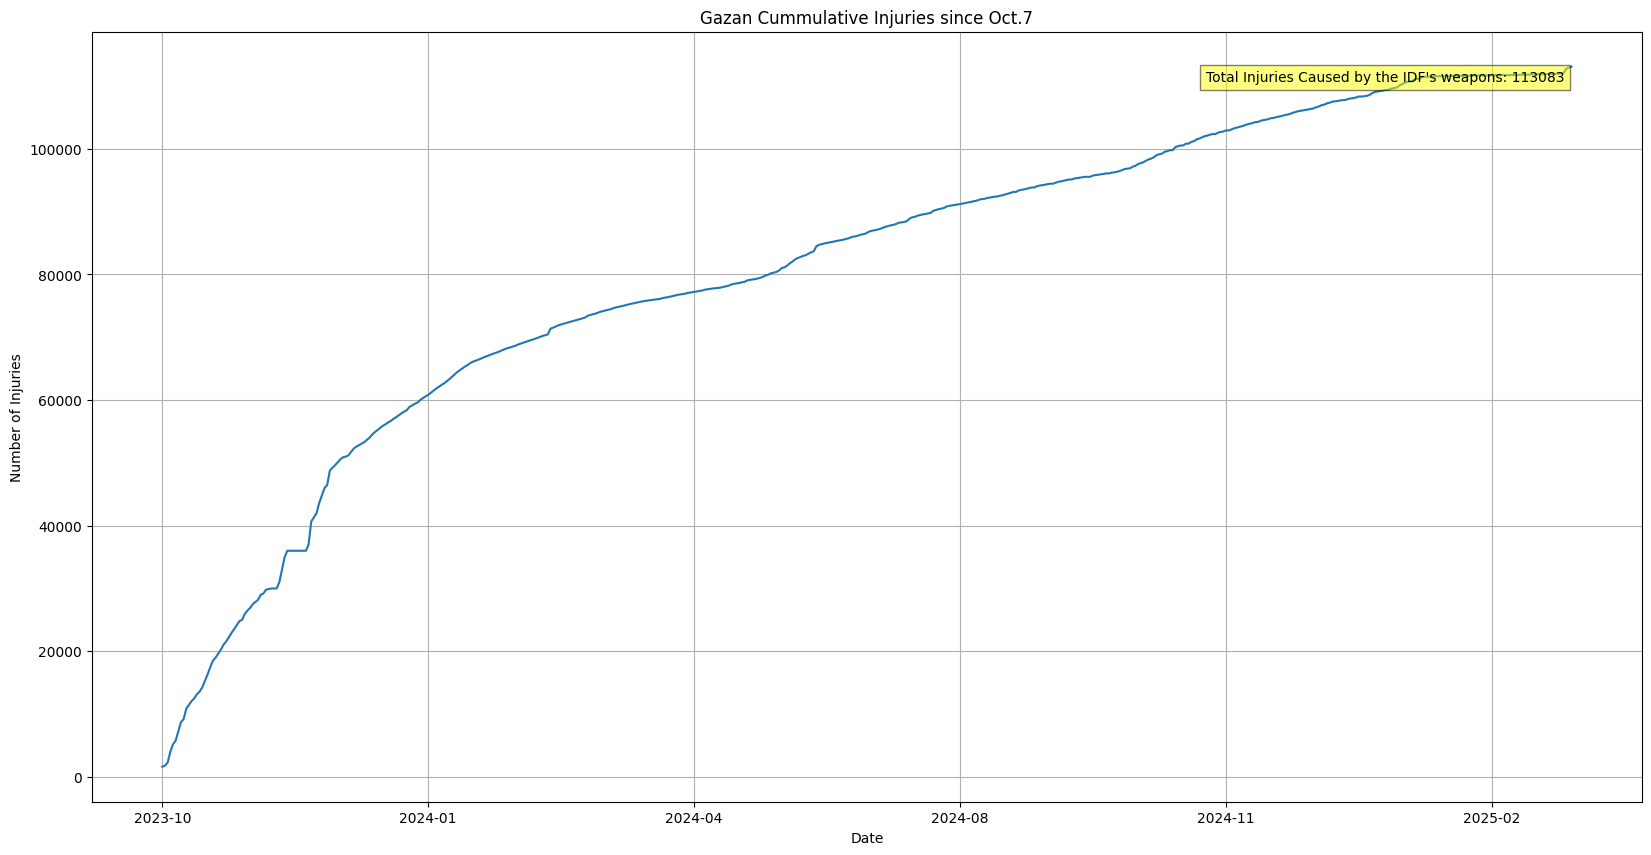

In [15]:
ax = plt.axes()
gaza.plot("report_month", "ext_injured_cum", ax=ax, grid=True, legend=None, figsize=(20, 10), title="Gazan Cummulative Injuries since Oct.7", xlabel="Date", ylabel="Number of Injuries")

# Get the maximum number of deaths
max_total = gaza["ext_injured_cum"].max()
max_total_date = gaza.loc[gaza["ext_injured_cum"].idxmax(), "report_date"]

# Annotate the maximum values on the plot
plt.text(0.95, 0.95, f"Total Injuries Caused by the IDF's weapons: {max_total}", 
         transform=ax.transAxes, ha='right', va='top',
         bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

# West-Bank Report

Since the attacks were more focused on Gaza, the numbers here (in comparison with Gaza) are small, however, those are human lives, and the number is never actuall "small"

In [16]:
def viz_west_bank(field, xlabel=None, ylabel=None, title=None, grid=True, legend=None):
    ax = plt.axes()
    west_bank.plot("report_month", field, ax=ax, grid=grid, legend=legend, title=title, xlabel=xlabel, ylabel=ylabel, figsize=(20, 10))
    plt.show()

In [17]:
print("West Bank Head")
west_bank.head()

West Bank Head


,report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
0,2023-10-07,6.0,6.0,197.0,197.0,2.0,2.0,31.0,31.0,3,0,23,1,3,un
1,2023-10-08,8.0,14.0,127.0,324.0,3.0,5.0,7.0,38.0,13,1,194,1,9,un
2,2023-10-09,4.0,18.0,88.0,412.0,0.0,5.0,19.0,57.0,15,3,295,34,19,un
3,2023-10-10,5.0,23.0,72.0,484.0,0.0,5.0,7.0,64.0,19,3,332,39,29,un
4,2023-10-11,6.0,29.0,85.0,569.0,2.0,7.0,17.0,81.0,26,3,427,62,39,un


outliers: [array([6.0, 8.0, 6.0, 7.0, 17.0, 15.0, 8.0, 6.0, 7.0, 9.0, 7.0, 7.0, 18.0,
       8.0, 6.0, 6.0, 7.0, 7.0, 7.0, 6.0, 11.0, 8.0, 7.0, 7.0, 13.0, 7.0,
       14.0, 12.0, 6.0, 6.0, 7.0, 9.0, 9.0, 7.0, 16.0, 6.0, 8.0, 7.0,
       19.0], dtype=object)]
boxes: [array([0., 0., 2., 2., 0.])]
medians: [array([1., 1.])]
whiskers: [array([0., 0.]), array([2., 5.])]



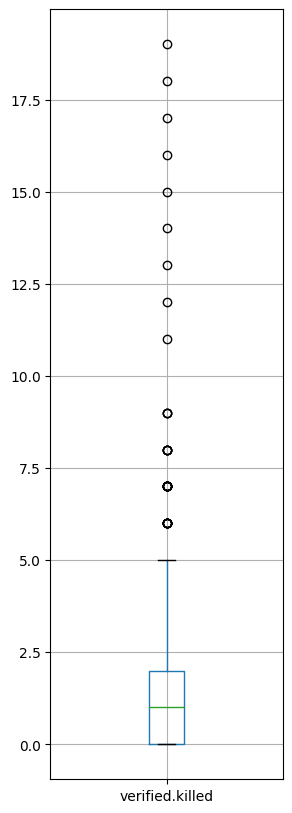

In [18]:
_, bp = west_bank[["verified.killed"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

outliers: [array([197.0, 127.0, 88.0, 72.0, 85.0, 49.0, 613.0, 54.0, 150.0, 160.0,
       88.0, 57.0, 75.0, 87.0, 91.0, 74.0, 70.0, 43.0, 122.0, 94.0, 90.0,
       38.0, 39.0, 46.0, 126.0, 36.0, 52.0, 44.0, 49.0, 37.0, 36.0, 106.0,
       53.0, 56.0, 58.0, 42.0, 36.0, 50.0, 45.0, 70.0, 47.0, 49.0, 42.0,
       66.0], dtype=object)]
boxes: [array([ 3.,  3., 16., 16.,  3.])]
medians: [array([7., 7.])]
whiskers: [array([3., 0.]), array([16., 35.])]



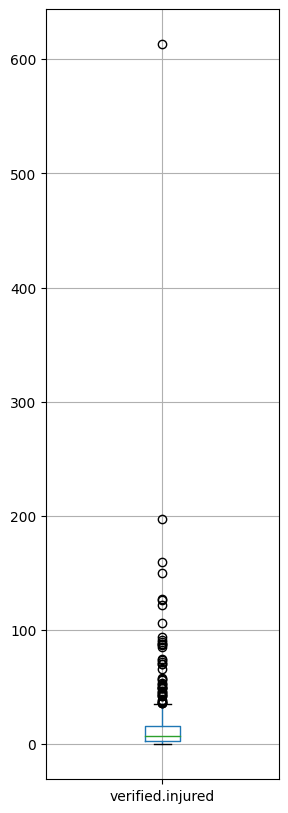

In [19]:
_, bp = west_bank[["verified.injured"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

In [20]:
west_bank["report_month"] = west_bank.report_date.apply(lambda x: x[:-3])
west_bank_group_by_month = west_bank.groupby("report_month").sum().drop(columns=["report_date", "flash_source"])
west_bank_group_by_month.describe()

,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,56.153846,13474.692308,506.000000,141224.692308,12.384615,3281.769231,80.692308,21452.846154,13298.769231,3184.692308,139332.538462,21258.307692,23500.384615
std,32.981930,5935.610294,591.373261,44354.652451,9.665561,1306.749731,80.891269,7807.121523,5822.265312,1240.016088,44544.723729,7937.286442,13668.247831
min,28.000000,1811.000000,140.000000,36265.000000,5.000000,539.000000,28.000000,3428.000000,1770.000000,485.000000,32368.000000,3045.000000,2360.000000
25%,32.000000,10687.000000,227.000000,130523.000000,6.000000,2734.000000,31.000000,19883.000000,10641.000000,2712.000000,130093.000000,19648.000000,13128.000000
50%,39.000000,13710.000000,266.000000,146421.000000,8.000000,3379.000000,47.000000,22605.000000,13652.000000,3373.000000,145504.000000,22336.000000,22403.000000
75%,68.000000,17519.000000,373.000000,171925.000000,13.000000,4276.000000,91.000000,26611.000000,17184.000000,4086.000000,170973.000000,26497.000000,34285.000000
max,125.000000,22715.000000,2299.000000,202535.000000,39.000000,5121.000000,273.000000,32338.000000,22380.000000,4896.000000,199258.000000,32736.000000,46195.000000


outliers: [array([125.0], dtype=object)]
boxes: [array([32., 32., 68., 68., 32.])]
medians: [array([39., 39.])]
whiskers: [array([32., 28.]), array([ 68., 117.])]



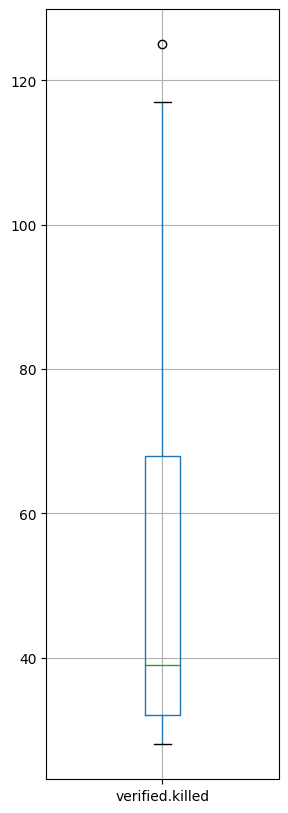

In [21]:
_, bp = west_bank_group_by_month[["verified.killed"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

outliers: [array([2299.0, 1020.0, 699.0], dtype=object)]
boxes: [array([227., 227., 373., 373., 227.])]
medians: [array([266., 266.])]
whiskers: [array([227., 140.]), array([373., 373.])]



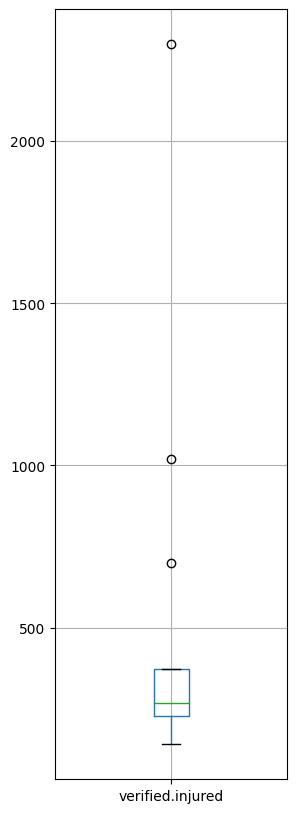

In [22]:
_, bp = west_bank_group_by_month[["verified.injured"]].boxplot(return_type="both", figsize=(3,10))
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(f"outliers: {outliers}\nboxes: {boxes}\nmedians: {medians}\nwhiskers: {whiskers}\n")

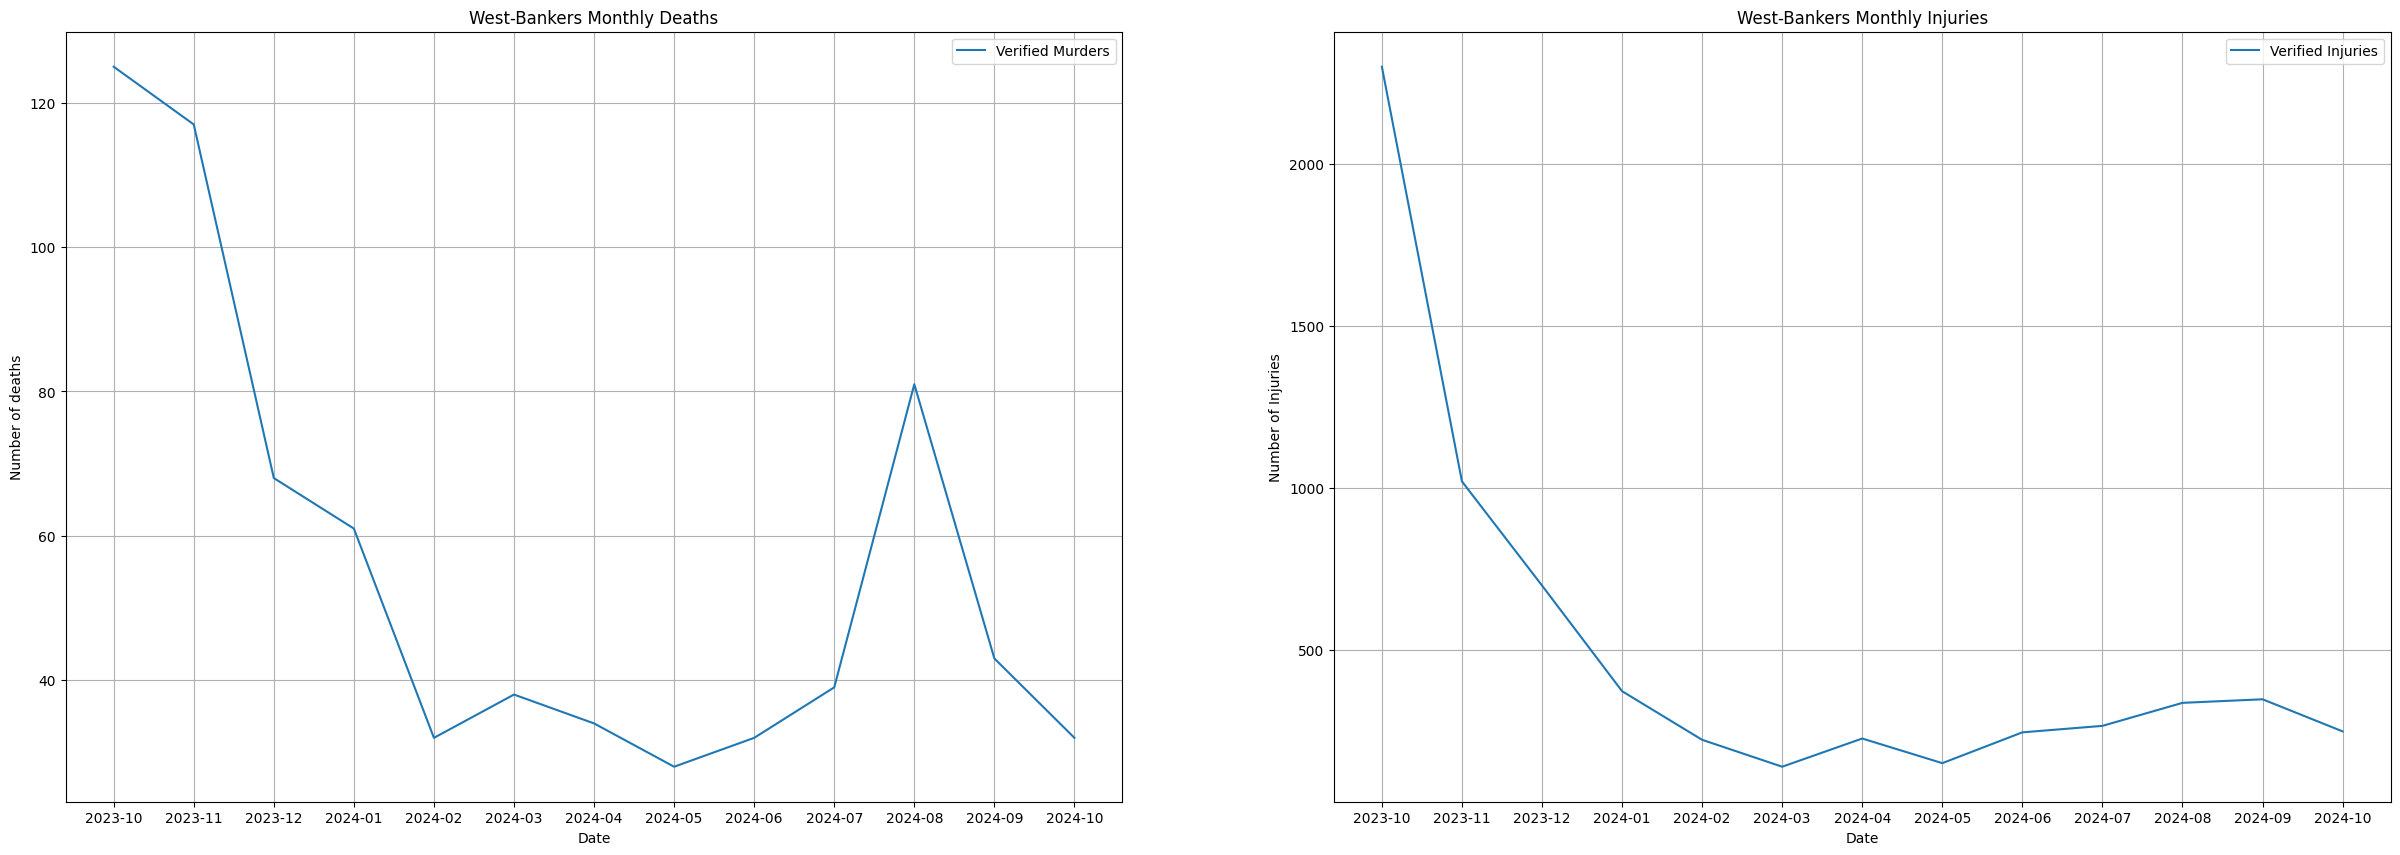

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10), sharex=True)

# West-Bankers Deaths by Month
ax1.plot(west_bank_group_by_month.index, west_bank_group_by_month["verified.killed"])
ax1.set_title("West-Bankers Monthly Deaths")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of deaths")
ax1.grid(visible=True)
ax1.legend(["Verified Murders"])

# West-Bankers Injuries by Month
ax2.plot(west_bank_group_by_month.index, west_bank_group_by_month["verified.injured"])
ax2.set_title("West-Bankers Monthly Injuries")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Injuries")
ax2.legend(["Verified Injuries"])
ax2.grid(visible=True)

plt.show()

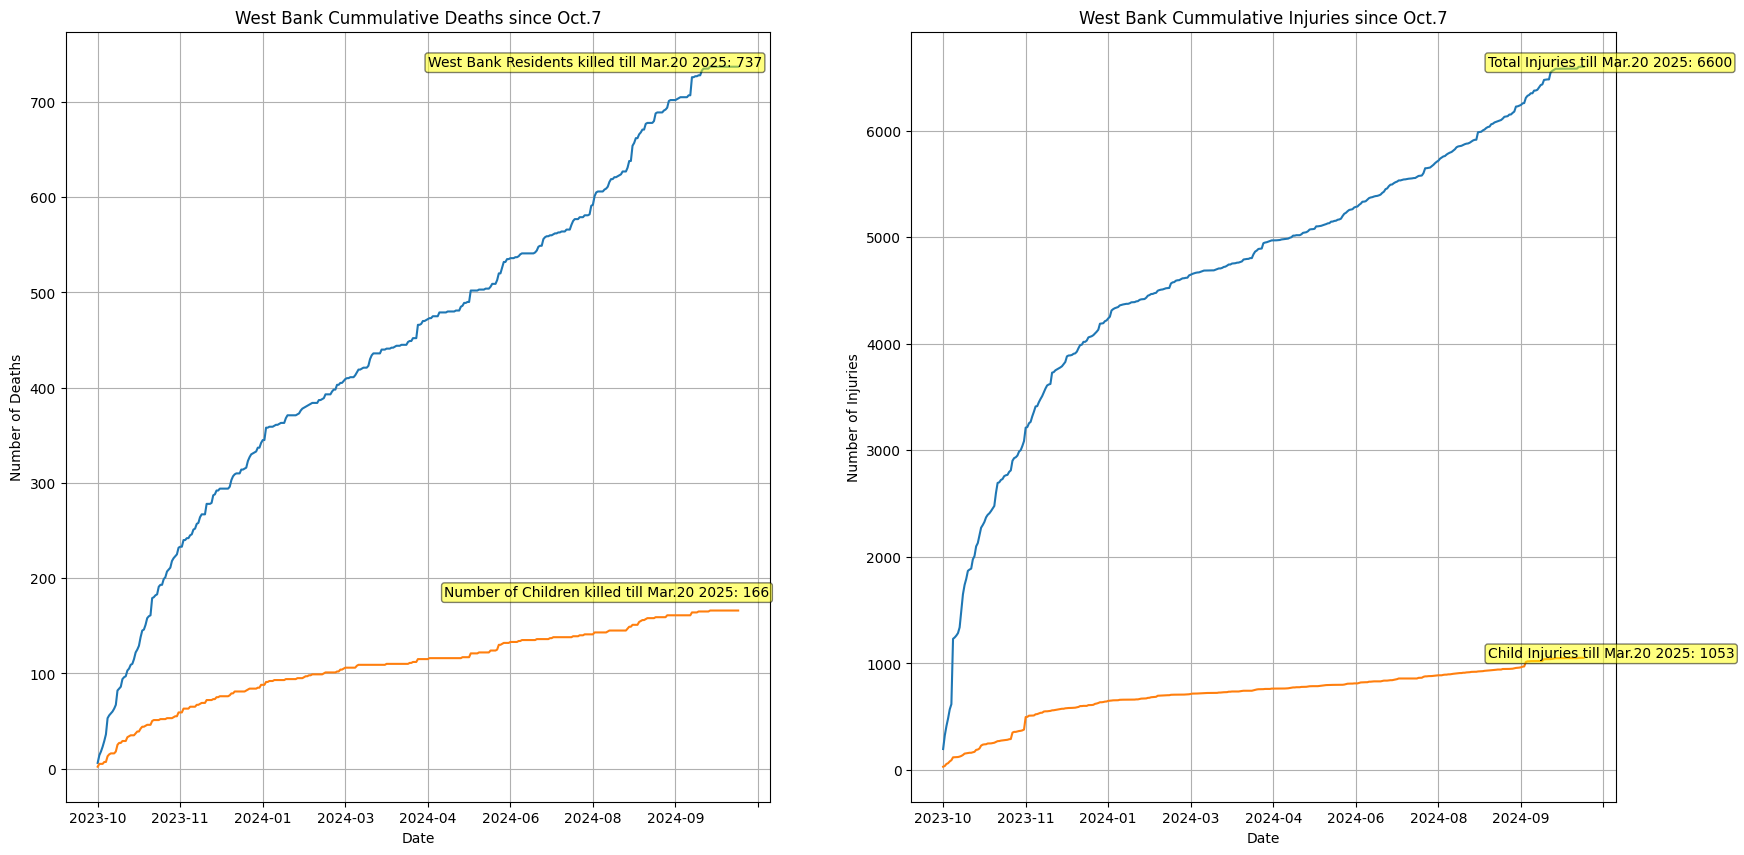

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))

west_bank.plot("report_month", ["verified.killed_cum", "verified.killed_children_cum"],
               ax=ax1, grid=True, legend=None, title="West Bank Cummulative Deaths since Oct.7", xlabel="Date", ylabel="Number of Deaths")

west_bank.plot("report_month", ["verified.injured_cum", "verified.injured_children_cum"],
               ax=ax2, grid=True, legend=None, title="West Bank Cummulative Injuries since Oct.7", xlabel="Date", ylabel="Number of Injuries", figsize=(20, 10))
# Get the maximum number of deaths
max_total, max_child_death, max_set_attack = west_bank["verified.killed_cum"].max(), west_bank["verified.killed_children_cum"].max(), west_bank["settler_attacks_cum"].max()
max_inj, max_inj_child = west_bank["verified.injured_cum"].max(), west_bank["verified.injured_children_cum"].max()

# Annotate the maximum values on the plot
ax1.annotate(f'West Bank Residents killed till Mar.20 2025: {int(max_total)}', 
            xy=(200, max_total),
            xytext=(0,0), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax1.annotate(f'Number of Children killed till Mar.20 2025: {int(max_child_death)}', 
            xy=(210, max_child_death),
            xytext=(0,10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax2.annotate(f'Total Injuries till Mar.20 2025: {int(max_inj)}', 
            xy=(330, max_inj),
            xytext=(0,0), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

ax2.annotate(f'Child Injuries till Mar.20 2025: {int(max_inj_child)}', 
            xy=(330, max_inj_child),
            xytext=(0,0), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

plt.show()

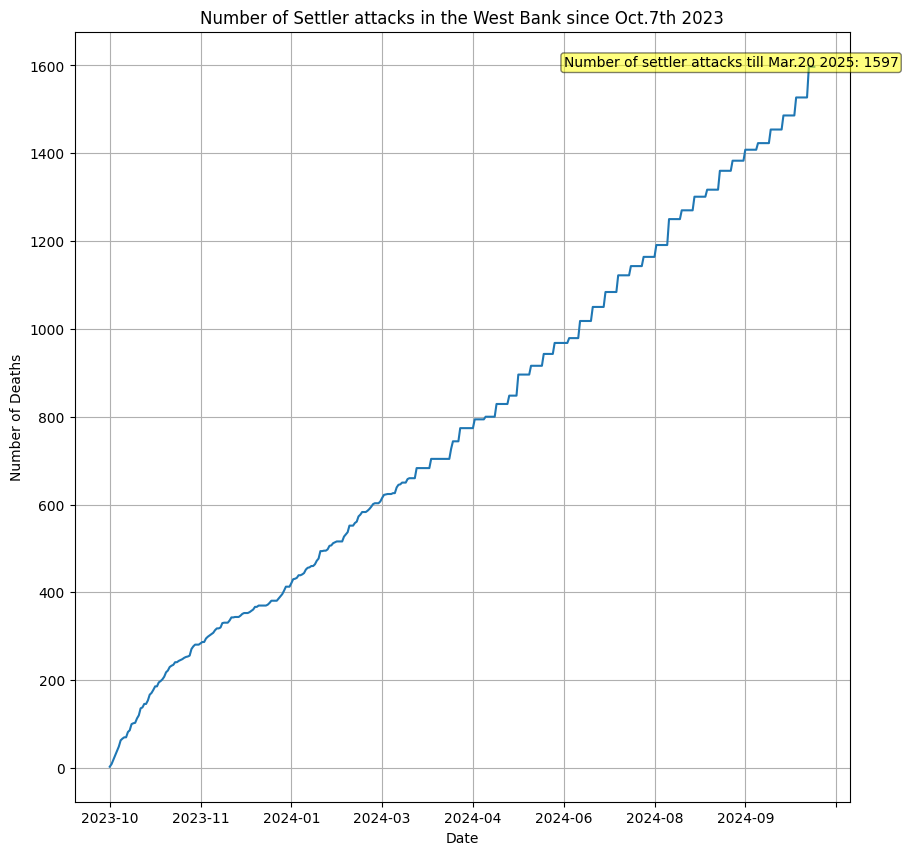

In [25]:
ax = plt.axes()

west_bank.plot("report_month", ["settler_attacks_cum"],
               ax=ax, grid=True, legend=None, title="Number of Settler attacks in the West Bank since Oct.7th 2023",
               xlabel="Date", ylabel="Number of Deaths", figsize=(10, 10))

# Get the maximum number of deaths
max_set_attack = west_bank["settler_attacks_cum"].max()

# Annotate the maximum values on the plot
ax.text(250, max_set_attack, f'Number of settler attacks till Mar.20 2025: {int(max_set_attack)}',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

plt.show()

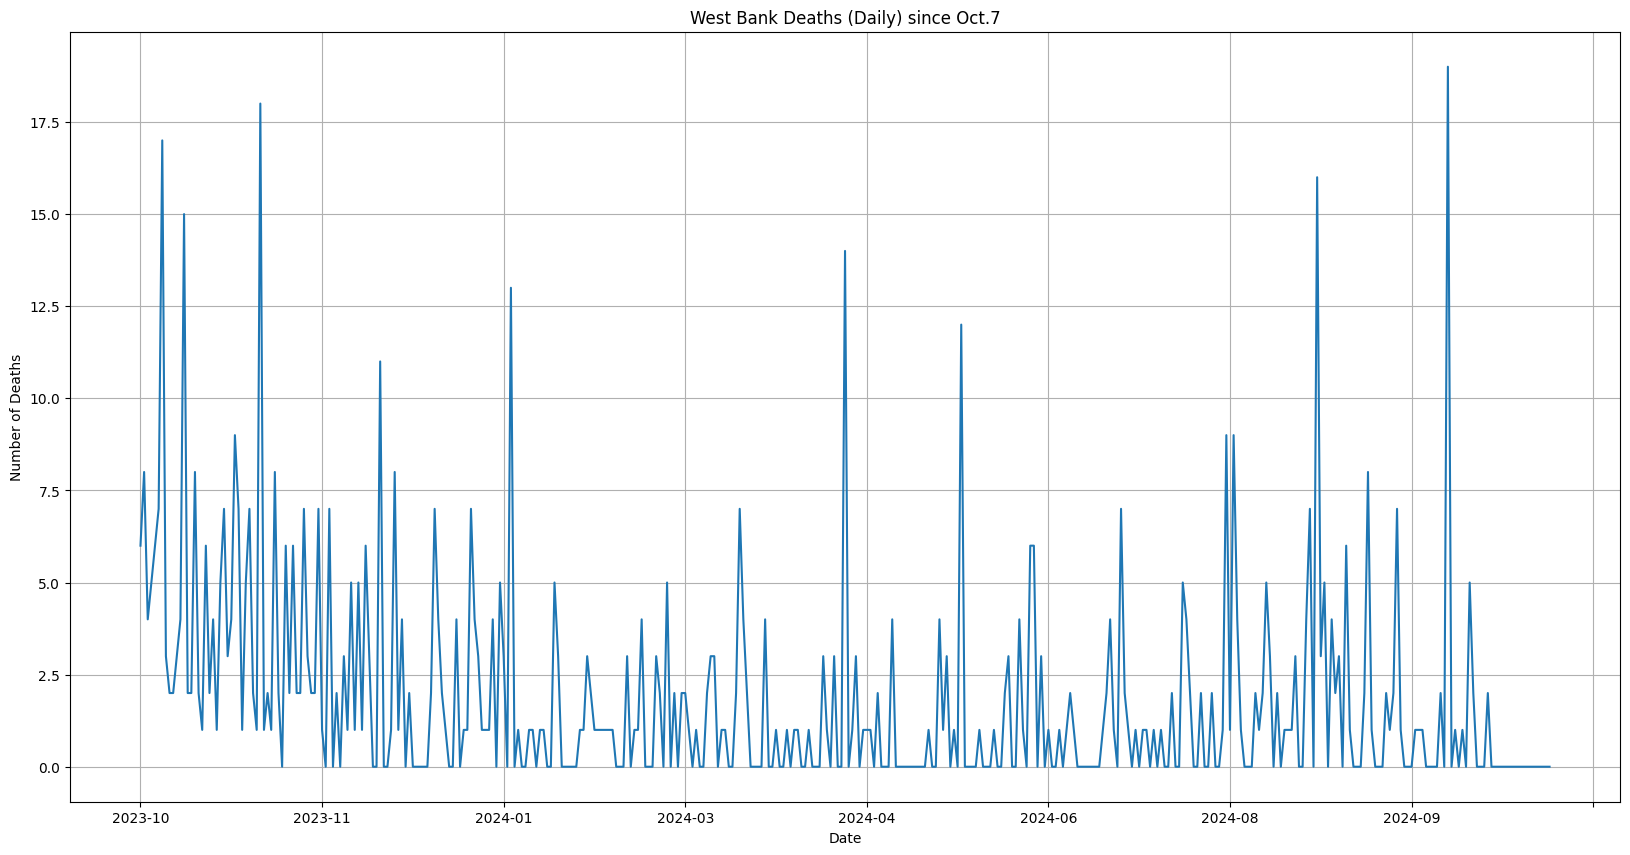

In [26]:
viz_west_bank("verified.killed", xlabel="Date", ylabel="Number of Deaths", title="West Bank Deaths (Daily) since Oct.7")

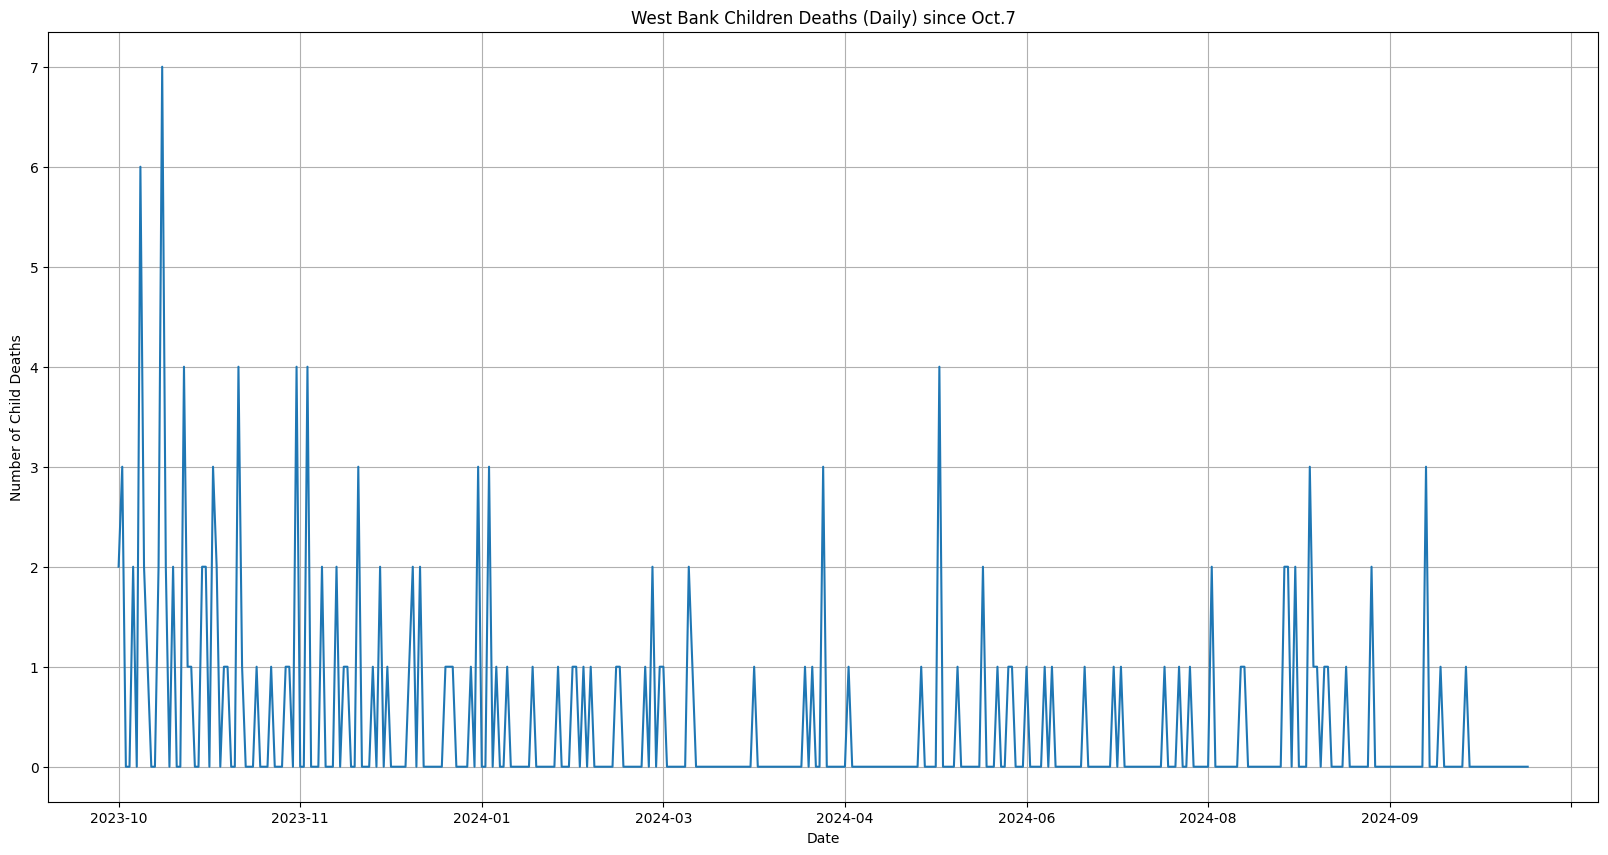

In [27]:
viz_west_bank("verified.killed_children", xlabel="Date", ylabel="Number of Child Deaths", title="West Bank Children Deaths (Daily) since Oct.7")

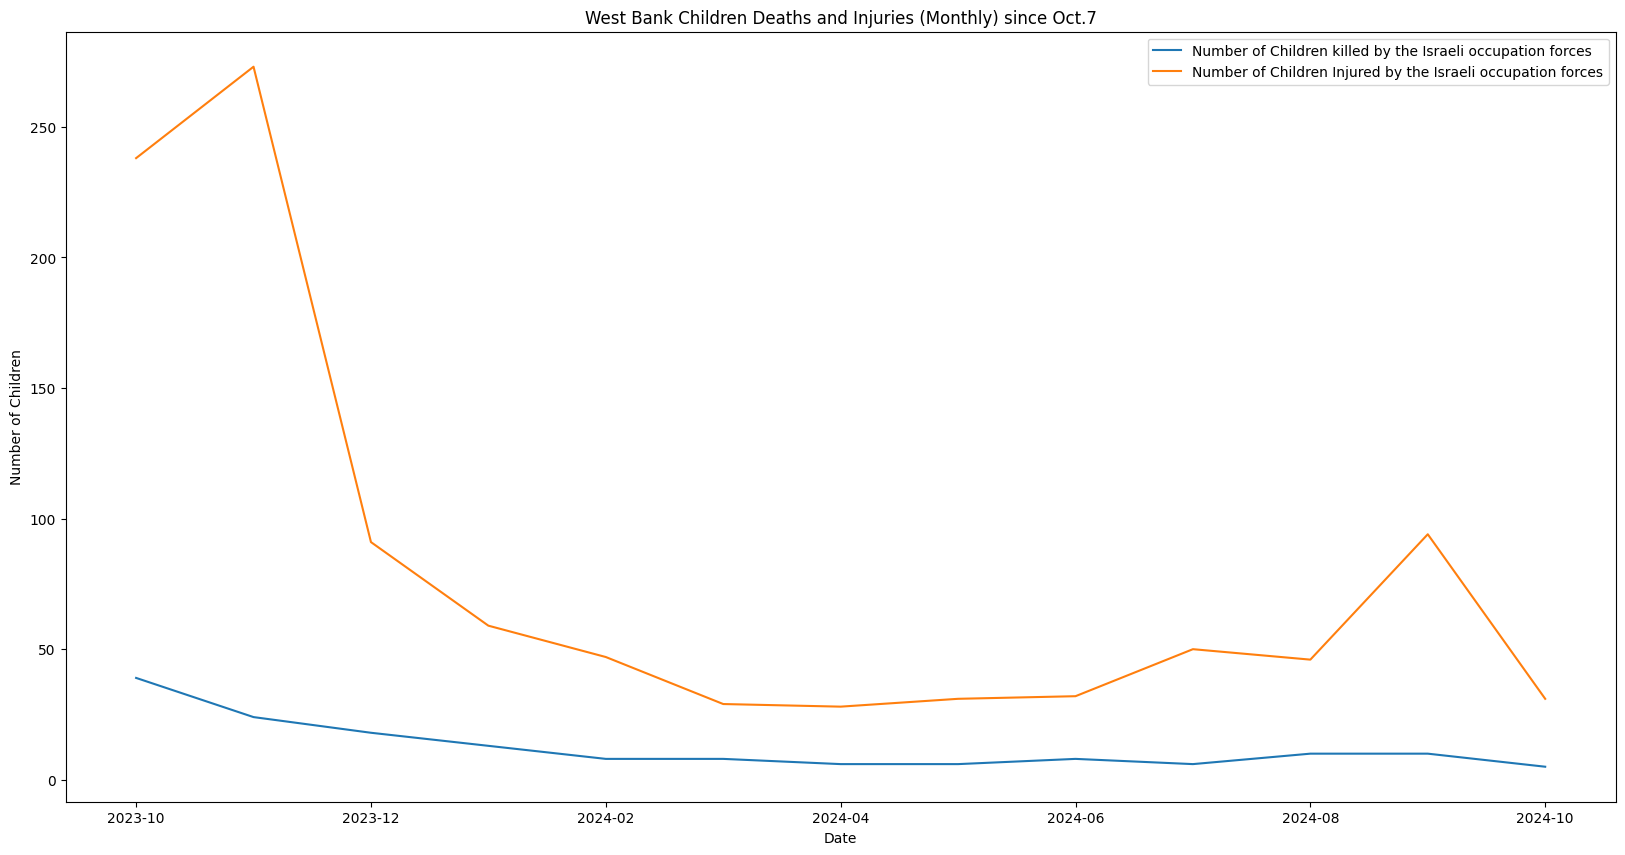

In [28]:
ax = plt.axes()
west_bank_group_by_month.plot(y=["verified.killed_children", "verified.injured_children"], title="West Bank Children Deaths and Injuries (Monthly) since Oct.7", ax=ax,
                                 xlabel="Date", ylabel="Number of Children", figsize=(20, 10))
ax.legend(["Number of Children killed by the Israeli occupation forces", "Number of Children Injured by the Israeli occupation forces"])
plt.show()